# Support Vector Machines

## 1. Linearly separable case

Assume we are given a training $\{(x_j,y_j),\ j=1..N\}$ set of $N$ observations of multivariate feature vectors $x_j$ and corresponding binary labels $y_j=\pm 1$, such that two classes corresponding to $y=0$ and $y=1$ are linearly separable, i.e. there exists at least one such a hyperplane $x^T w+b=0$, such that from any side with respect to the hyperplane (above/below) all the $x_j$ on that side are labeled in the same way, and the points on the opposite side are labeles in the opposite way. Analytically it means that there exists a hyperplane 
$$
x^T w+b=0\hspace{5ex} (1).
$$ 
such that
$$
x_j^T w+b>0,\ y_j=1,
$$
$$
x_j^T w+b<0,\ y_j=-1,
$$
or equivalently for all $j$,
$$
y_j(x_j^T w+b)>0
\hspace{5ex} (2).
$$
Such a separating hyperplane is certainly not unique. Clearly for other $w,b$ sufficiently close to the given ones, the above condition (2) will hold. Also for all sufficiently small $m$ the stronger inquelity will still hold:
$$
y_j(x_j^T w+b)\geq m.
\hspace{5ex} (3)
$$
So as the separating hyperplane is not unique our objective will be to point out the optimal one in a sense - the one giving the best possible separation. What does that mean?

For a given choice of $w,b$ one can point out an upper bound of such $m$ --- the quantity $M=M(w,b)$ such that
$$
y_j(x_j^T w+b)\geq M,
\hspace{5ex} (4)
$$
however for any $m>M$ inequality (3) will fail for some $j$. Then if one consideres all the hyperplanes $x_j^T w+b=m$ for $|m|\leq M$, all together they make an entire separating layer of the thickness (shortest Euclidian distance between the boundary hyperplanes $x_j^T w+b=-M$ and $x_j^T w+b=M$) - also called margin - equal to $2M/||w||$, where $||w||^2=w^T w=\sum\limits_i (w^i)^2$ (as vector $w$ being orthogonal to the hyperplane points the direction of the shortest vector connecting the two boundary planes).

Our objective is to find such a separating hyperplane (1) such that the separating layer margin is maximal, thus maximizing our considence while using the classifier, i.e.
$$
2M/||w||\to {\rm max}
$$
given (4). As the hyperplane (1) does not actually depend on the magnitude of $||w||$ and $b$ but only on the direction of the vector $w$ and relative value of $b$, then considering $w:=w/M(w,b), b:=b/M(w,b)$ one can always get to an equivalent setting with $M=1$. This means that our problem can be rewritten as
$$
w^T w\to {\rm min}, \hspace{5ex} (5)
$$$$
\forall j, y_j(x_j^T w+b)\geq 1. \hspace{5ex} (6)
$$
This is a constrained optimization problem aiming to find $w$ and $b$ satisfying conditions (6) and optimizing (5). The objective function to minimize is quadratic, while the inequality constrains are linear.

Once the optimal separating hyperplane is found, those $x_j$ for which $y_j(x_j^T w+b)=1$ (i.e. those touching the margin) are called support vectors.



## Example 1. "Toy" example with a streighforward solution

In [1]:
import numpy as np
from numpy import linalg
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 10, 8

/Users/Dexter/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


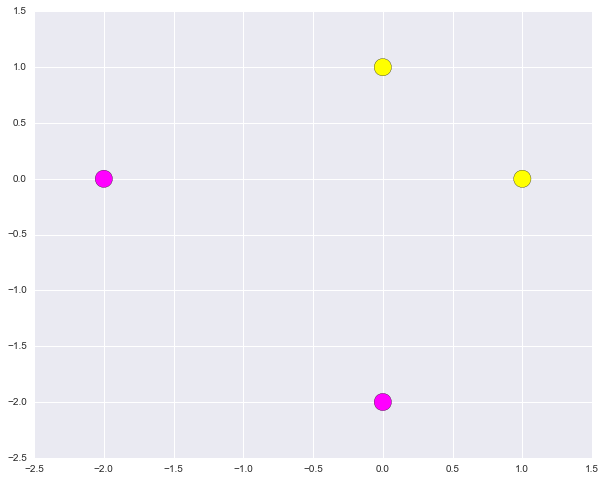

In [2]:
#Generate and visualize the toy data
X=np.array([[1,0],[0,1],[-2,0],[0,-2]])
Y=np.array([1]*2+[-1]*2)
plt.scatter(X[:, 0].T, X[:, 1].T, c=Y, s=300, cmap='spring')

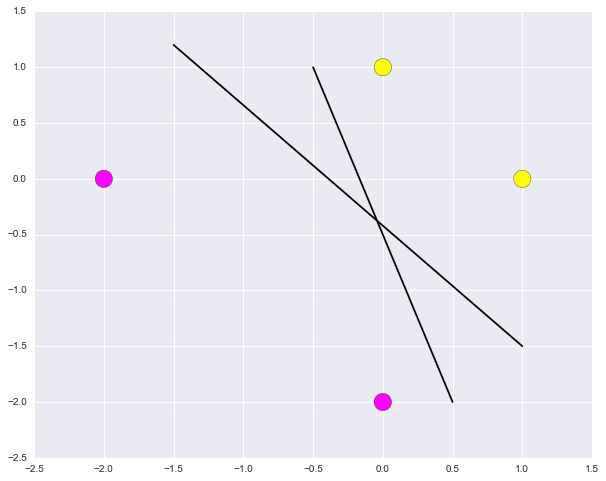

In [3]:
# Question: How to find the a hyperplane(a line) to separate the data? We could have multiple choices, but which one is the best?
plt.scatter(X[:, 0], X[:, 1], c=Y, s=300, cmap='spring')
plt.plot([-1.5,1], [1.2,-1.5], 'k-');
plt.plot([0.5,-.5],[-2,1], 'k-');

(1) We need to find the hyperplane: $w_1 x_1+w_2 x_2+b=0$ 

such that:
$$\begin{cases} \underset{w=(w_1,w_2),b,\Vert w \Vert=1}{\text{max}} M \\
y_i(x_{i}^{T}w + b)\ge M, \ i =1,2,3,...N
\end{cases}$$

We divide both sides of the second equation by M (M>0), and let new $w_{new}=\frac{w}{M}$(so,$M=\frac{1}{\Vert w_{new} \Vert}$) we can get this equivalent condition for calculation convinence:
$$\begin{cases} \underset{w,b}{\text{min}} \Vert w \Vert^2 \\
y_i(x_{i}^{T}w + b)\ge1
\end{cases}$$

Now let's solve those conditions by hand for our partucular case, with respect to $X=\left[(1,0),(0,1),(-2,0),(0,-2)\right]$ and $Y=(1,1,-1,-1)$:

$$\begin{cases} \underset{w,b}{\text{min}} (w_1^2+w_2^2)\\
w_1+b\ge1\hspace{3ex}(E1.1)\\
w_2+b\ge1\hspace{3ex}(E1.2)\\
(-1)*(-2w_1+b)\ge1\hspace{3ex}(E1.3)\\
(-1)*(-2w_2+b)\ge1\hspace{3ex}(E1.4)
\end{cases}$$

(E1.1)+(E1.3)$\Rightarrow$
$3 w_1\ge2$

(E1.2)+(E1.4)$\Rightarrow$
$3 w_2\ge2$

(E1.1),(E1.3)$\Rightarrow$
$2 w_1-1\ge b \ge 1-w_1$

(E1.2),(E1.3)$\Rightarrow$
$2 w_2-1\ge b \ge 1-w_2$

Obviousely $(w_1^2+w_2^2)$ reaches the minimum under above conditions for the minimal possible $w_1=w_2=2/3$. Then $b=1/3$. Those values satisy (E1.1)-(E1.4) and provide the unique (up to a constant factor) definition for the separating line as $2 x_1+2 x_2+1=0$. 

Then the corresponding maximal value of the margin is $M=\frac{1}{||w||}=\frac{1}{\sqrt{8/9}}=\frac{3\sqrt{2}}{4}$.

Let's see the plot:

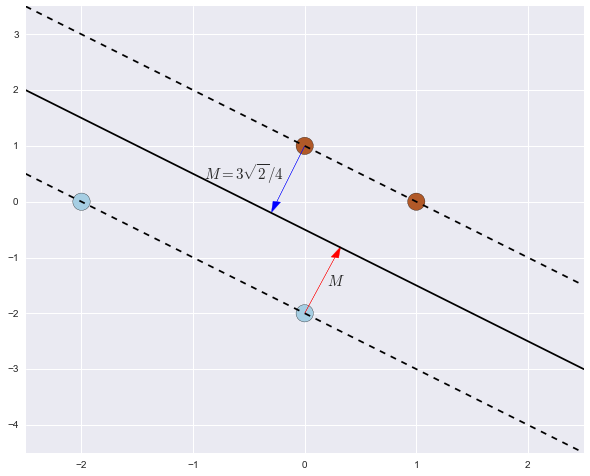

In [4]:
#Now let's plot the graph

x1 = np.linspace(-2.5, 2.5)
x2 = -x1-0.5 # this is the separating hyperplane we found
M=3*np.sqrt(2)/4 #this is the M 

# plot the parallels to the separating hyperplane that pass through the

x2_down = -x1-0.5+1.5 #1.5=M||w||=\sqrt{2}M


x2_up = -x1-0.5-1.5

# plot the line, the points, and the nearest vectors to the plane
plt.plot(x1, x2, 'k-')
plt.plot(x1, x2_down, 'k--')
plt.plot(x1, x2_up, 'k--')
plt.axis('tight')
plt.show
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired,s=300)
plt.arrow(0, 1, -0.25, -1, fc="b", ec="b", head_width=0.07, head_length=0.2)
plt.annotate(r"$M=3\sqrt{2}/4$", xy=(-0.9, 0.4), fontsize=15)
plt.arrow(0, -2, 0.27, 1, fc="r", ec="r", head_width=0.07, head_length=0.2);
plt.annotate(r"$M$", xy=(0.2, -1.5), fontsize=15)

In [5]:
# So in this case all the vectors touch the margin and happen to be the support vectors.

### Lagrange duality

In order to provide an efficient algorithm for solving the optimization problem (5)-(6), we can transform the problem to an equivalent form. Introduce arbitrary non-negative parameters $\alpha_j\geq 0$ and construct a following expression called Lagrangian:
$$
L(w,b,\alpha)=w^T w-\sum\limits_j \alpha_j \left(y_j(x_j^T w+b)-1\right),\hspace{5ex}(7)
$$
Now one can show that our original optimization problem (5), (6) is equivalent to the following problem called primal:

1. For each specific choice of $w,b$ find 
$$
\alpha^*=\alpha^*(w,b)={\rm argmax}_{\alpha, \alpha_j\geq 0} L(w,b,\alpha)
$$
maximizing (7) with respect to 
$$
\alpha_j\geq 0.\hspace{5ex}(8)
$$

2. Then find 
$$
(w^*,b^*)={\rm argmin}_{w,b} L(w,b,\alpha^*(w,b)). \hspace{5ex}(9)
$$
maximizing (7) with respect to $\alpha$ found above.

Indeed, assume that $(w^*,b^*)$ serves as a solution to the optimization problem (5),(6). For any $w,b$ satisfying (6), including $w^*,b^*$, the $\alpha_j=0$ (for all $j$ or at least for those, having $y_j(x_j^T w+b)>1$, i.e. not corresponding to support vectors) serves as a corresponding solution for the first step. While at the second step for any $w,b$ satisfying (6) we'll get $L(w,b,\alpha(w,b))=w^T w\geq (w^*)^T w^*$, while for $w,b$ not satisfying (6) we'll get $L(w,b,\alpha(w,b))=+\infty$. So $w^*,b^*$ indeed serves as a solution for the primal problem (9). On the other hand if $w^*,b^*$ serves as a solution for the primal problem (9), then they satisfy (6) and then $(w^*)^T w^*$ should be the minimal one among all $w,b$ satifying (6), so $w^*,b^*$ serves as a solution for (5),(6).

But in practice another closely related - dual problem - is actually easier to handle instead of the primal problem. Consider the similar layout but flipping the steps:

1. For each specific choice of $\alpha$ find $w^*(\alpha),b^*(\alpha)$, such that
$$
(w^*,b^*)={\rm argmax}_{w, b} L(w,b,\alpha).
$$

2. Then find
$$
\alpha^*={\rm argmin}_{\alpha, \alpha_j\geq 0} L(w^*(\alpha),b^*(\alpha),\alpha). \hspace{5ex}(9)
$$
minimizing (7) with respect to $w^*,b^*$ found above.

It can be proven that under certain conditions (which are satisfied by our SVM Lagrangian) the dual problem is equivalent to the primal. 

The solution of the dual problem is now streightforward: for the first step we consider a system of equations having partial derivatives of Lagrangian by $w^i$ and $b$ equal to zero, i.e.
$$
2 w^i=\sum\limits_j \alpha_j y_j x_j^i,
$$
or in a vector form:
$$
w=\frac{1}{2}\sum\limits_j \alpha_j y_j x_j \hspace{5ex}(10.1),
$$
and
$$
0=\sum\limits_j \alpha_j y_j \hspace{5ex}(10.2).
$$

Condition (10.1) allows to find $w$ given any $\alpha$ satisfying (10.2) (for other $\alpha$ the Lagrangian is unconstrained for $b\to\infty$, i.e. minimum is $-\infty$). Then substituting (10.1)-(10.2) into (9) we get
$$
\alpha^*={\rm argmin}_{\alpha, \alpha_j\geq 0, \sum\limits_j \alpha_j y_j=0} \left[\frac{1}{8}\sum\limits_{j,k} \alpha_j\alpha_k y_j y_k x_j^T x_k+\sum\limits_j \alpha_j\right]. \hspace{5ex}(11)
$$

So after all our optimization problem is reduced to (11). Then once $\alpha^*$ is found, corresponding $w^*$ is found from (10.1). However we got no expression for $b^*$. Finding $b^*$, however, is pretty streighforward, returing to the original problem of maximizing the margin - it should put the hyperplane on maximal (this way equal) distance from the closest $x_j$ for $y_j=1$ and the closest $x_j$ for $y_j=0$, i.e.
$$
b^*=-\frac{\max\limits_{j, y_j=-1}(w^*)^T x_j+\min\limits_{j, y_j=1}(w^*)^T x_j}{2}. \hspace{5ex}(12)  
$$



Solutions of the optimization problem (11) is implemented throug a sequential minimal optimization (SMO) algorithm in the SVC function of the svm package inside sklearn. Let's see how it works for the example above:

## Example 1 revisited.

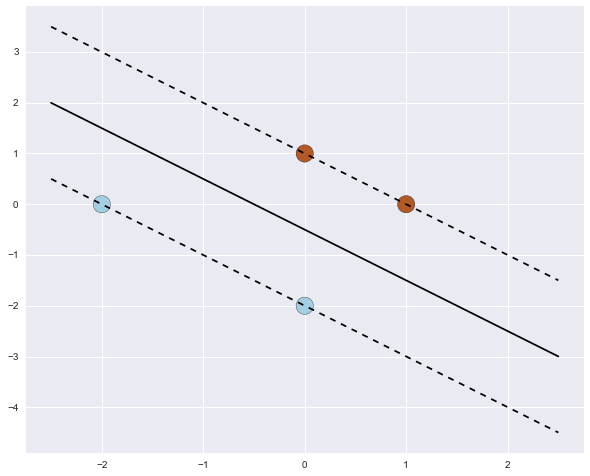

In [6]:
from sklearn import svm
# fit the model
clf = svm.SVC(kernel='linear')  # as we use linear svm we specify a linear kernel (see below what does it mean)
clf.fit(X, Y)

# get the separating hyperplane
w = clf.coef_[0]
########################################################################
a = -w[0] / w[1]
x1 = np.linspace(-2.5, 2.5)
x2 = a * x1 - (clf.intercept_[0]) / w[1]

# plot the parallels to the separating hyperplane that go through the
# support vectors
b = clf.support_vectors_[0]
x2_down = a * x1 + (b[1] - a * b[0])
b = clf.support_vectors_[-1]
x2_up = a * x1 + (b[1] - a * b[0])

# plot the line, the points, and the nearest vectors to the plane
plt.plot(x1, x2, 'k-')
plt.plot(x1, x2_down, 'k--')
plt.plot(x1, x2_up, 'k--')

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=200, facecolors='none')
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired,s=300)

plt.axis('tight')
plt.show()

## 2. Soft Margin

Now imagine we have a non-fully separable case, i.e. there exist no separating hyperplain (1). This way let's try to shift some of the $x_j$ along the line orthogonal to the considered hyperplane towards their cluster on a distance controlled by a slack variable $\xi_j$ (specifically let 
$$
\tilde{x}_j:=x_j+w y_j \xi_j/||w||,
$$ 
so that the the two classes new classes of $\tilde{x}_j$ labeled by $y_j$ become linearly separable after such a shift, while trying to keep the cumularive shift as small as possible. Mathematically let's write it is a penalized optimization problem
$$
w^T w+C \sum_j \xi_j\to {\rm min}, \hspace{5ex} (13)
$$$$
\forall j, \xi_j\geq 0,\ y_j(x_j^T w+b)\geq 1-\xi_j. \hspace{5ex} (14)
$$
This way we relax the conditions on $y_j(x_j^T w+b)$ coming at a price of a corresponding penalty to the objective function (13), weighted by a certain regularization constant $C>0$.

In a similar way the problem (13), (14) can be transformed to a Lagrange dual one, leading to almost exactly the same solution (11) as before for $w$ with just a slight modification on the constrains for $\alpha$ which now become double-sided: $0\leq \alpha_j\leq C$.

Also the equation on $b$ would also become different.

In python soft margins are implemented by default in the considered function svm.SVC. We just need to specify parameter C rather than using its default value of 1, which might not always be appropriate. 

## Example 2. Artificually generated non-fully separable case

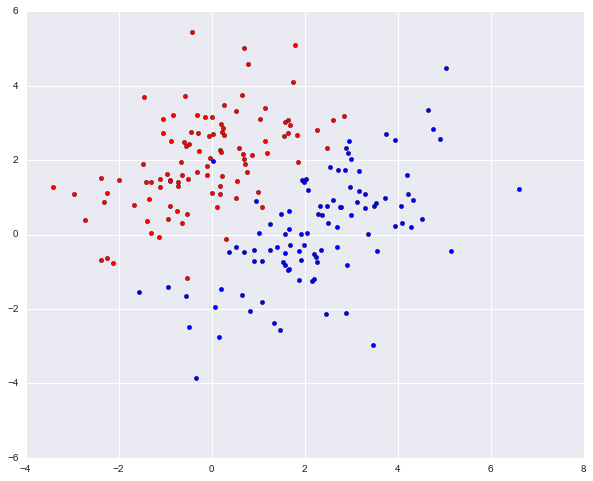

In [7]:
# Genearte data that are not fully seperatable this time.
np.random.seed(999)
mean1 = np.array([0, 2])
mean2 = np.array([2, 0])
cov = np.array([[1.8, 1.0], [1.0, 1.8]])
X1 = np.random.multivariate_normal(mean1, cov, 100)
y1 = np.ones(len(X1))
X2 = np.random.multivariate_normal(mean2, cov, 100)
y2 = np.ones(len(X2)) * -1

plt.scatter(X1[:,0],X1[:,1], c='r', cmap=plt.cm.Paired)
plt.scatter(X2[:,0],X2[:,1], c='b', cmap=plt.cm.Paired)

X=np.concatenate((X1,X2),axis=0)
Y=np.concatenate((y1,y2))
plt.show()

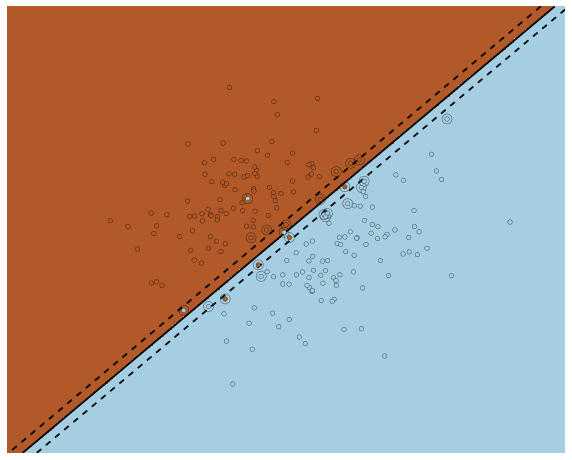

we successfully predict the 96.5 percent of data


In [8]:
# Obviousely, we cannot separate this two clusters with a single line.
# let's use a soft margin classifier model over the entire data with C=1.

clf = svm.SVC(kernel='linear',C=1) #you can try other C and find the model not too sensitive to it - it seems the only reasonable split is too obvious to depend on it 

clf.fit(X, Y)

# plot the line, the points, and the nearest vectors to the plane

plt.clf()

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
            facecolors='none', zorder=10) # plot support vectors with small circle

plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired) # plot X,Y

plt.axis('tight')
x_min = -6
x_max = 8
y_min = -6
y_max = 8

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j] # all the points in the plane
Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()]) # put them in the desion function

# Put the result into a color plot
Z = Z.reshape(XX.shape)

plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired) # Make a color for all the points in plane by our decision function.

plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
            levels=[-.5, 0, .5])
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()
# Let's calculate the IS errors: (Just use clf.predict to compare the predicted labels with current labels)
print "we successfully predict the {} percent of data".format(100-abs(clf.predict(X)-Y).sum()*50/len(Y))

In [9]:
# Let's see the OS test
# As usual, let's devide our data to test data and train data.

from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.33, random_state=990) #Use random_state to fix samples

clf = svm.SVC(kernel='linear',C=1) 
clf.fit(X_train, Y_train)

right=1.0*(clf.predict(X_test)==np.asarray(Y_test)).sum()/len(Y_test)

print "we successfully(OS) predict the {} percent of data".format((right)*100)

we successfully(OS) predict the 92.4242424242 percent of data


#### Let's use cross-validation to pick C and see the OS result.

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


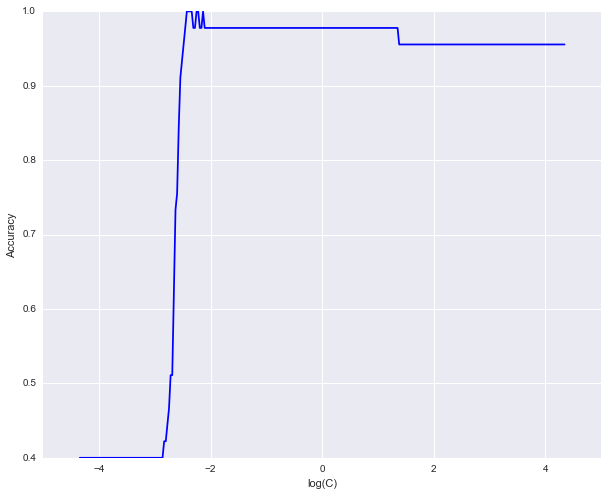

The optimal C we found is:0.00458660406152 and the corresponding accuracy is:1.0


In [10]:
#Let's do cross validation for choosing C since we see the result is not
#very good.
import pylab
import math
# Let's devide the training set into training set and validation set.
X_train_1,X_vali,Y_train_1,Y_vali = train_test_split(
    X_train, Y_train, test_size=0.33, random_state=70)
#When C is very small, which means we want to tolerate more mistakes. If C is very big, this
#means we hardly tolerate any mistakes. So, we cannot make a very big C if our data is not
#really seperable. Let's however choose from a broad range of reasonable options
C = np.linspace(-10,10,300)
C=[math.exp(i) for i in C]
OS_validation=[]
for c in C:
    clf = svm.SVC(kernel='linear',C=c) 
    clf.fit(X_train_1, Y_train_1)
    right=1.0*(clf.predict(X_vali)==np.asarray(Y_vali)).sum()/len(Y_vali)
    OS_validation.append(right)
temp=pd.DataFrame([C,OS_validation]).T
ind=len(temp.loc[temp.iloc[:,1]==temp.iloc[:,1].max()])/2 # Let's take the middle one for safty
C_opt=temp.loc[temp.iloc[:,1]==temp.iloc[:,1].max()].iloc[ind,0]

C=[math.log(y,10) for y in C] #for a better graph
pylab.plot(C,OS_validation,'b',)
pylab.legend(loc='upper right')
pylab.ylabel('Accuracy')
pylab.xlabel('log(C)')
pylab.show()

print("The optimal C we found is:{} and the corresponding accuracy is:{}".format(C_opt,temp.iloc[:,1].max())) # I choose the biggest one.


In [11]:
clf = svm.SVC(kernel='linear',C=C_opt)
clf.fit(X_train, Y_train)
correct=1.0*(clf.predict(X_test)==np.asarray(Y_test)).sum()/len(Y_test)
print "we successfully(OS) predict the {} percent of data by using linear model".format((correct)*100)

we successfully(OS) predict the 93.9393939394 percent of data by using linear model


## 3. Non-linearly separable case: kernels

Finally consider a case when there is no good way for buidling a linear separation for the classes (when the slack variables or a reasonable magnitude do not really help). In this case one may consider a non-linear transformation of the feature space (possibly also increasing its dimensionality) so that the the classes become linearly separable in the new feature space.

Define a transformation $\phi$ between the old feature space and the new one, so that we replace each observation $x_j$ with its image $\phi(x_j)$. This image might have a different (and sometimes large or even infinite number of dimensions). However we might not need to deal with $\phi(x_j)$ in their entire complexity. Indeed what we actually need is to solve a dual problem, which in the new transformed space could be written as
$$
\alpha^*={\rm argmin}_{\alpha, \alpha_j\geq 0, \sum\limits_j \alpha_j y_j=0} \left[\frac{1}{8}\sum\limits_{j,k} \alpha_j\alpha_k y_j y_k \phi(x_j)^T \phi(x_k)+\sum\limits_j \alpha_j\right]. 
$$
So as we see from above we do not actually need to know all the components of $\phi(x_j)$ but rather all the scalar products $\phi(x_j)^T \phi(x_k)$ for all the pairs $x_j, x_k$. So basically instead of dealing directly with the new trasformed feature space of $\phi(x)$, which might be multidimensional and sometimes hardly manageable, we only need to know a so called Kernel function $K(x,z)=\phi(x)^T \phi(z)$, which is a real-valued function of two inputs of the original dimensionality of the initial feature space. In fact we only need to know the matrix
$$
K=(K_{j,k},\ j,k=1..N)
$$
where
$$
K_{j,k}=K(x_j,x_k).
$$
In practice it is easier to deal with the Kernel function/matrix $K$ rather then with multidimensional transformations $\phi$ - this is known as the "Kernel trick".

For example if we have an original 3D space of features $x^1, x^2, x^3$ and we want to consider an extended feature space containing also all the multiplicative combinations of the original features up to the second order, we'll already have a 9D feature space of 
$$
\phi(x)=\{x^1, x^2, x^3, (x^1)^2, (x^2)^2, (x^3)^2, x^1 x^2, x^2 x^3, x^1 x^3\},
$$
or more generally
$$
\phi(x)=\{c x^1, c x^2, c x^3, (x^1)^2, (x^2)^2, (x^3)^2, x^1 x^2, x^2 x^3, x^1 x^3\},
$$
where the constant $c$ is in control of the relative weight between the first and second degree terms. The kernel function $K(x,z)$ in this case would be
$$
K(x,z)=c^2 \sum_p x^p z^p + \sum_{p,q} x^p z^p x^q z^q = (x^T z + c/2)^2 - c^2/4.  
$$
With the same success however we can omit the constant term $c^2/4$ from the Kernel making it as simple as
$$
K(x,z)=(x^T z + c/2)^2.  
$$
Clearly dealing with such as simple kernel over the original 3D space would be much computationally easier compared to having to deal with the scalar products in a transformed $9D$ space. So intead of ever trying to consider this transformed space directly one can simply consider a special kernel function over the original feature space.

However in order to be a valid Kernel (i.e. having such a $\phi$ that $K(x_j,x_k)=\phi(x_j)^T \phi(x_k)$) matrix $K$ should be symmetric and also positive semi-definite, i.e. such that for for any vector $z$, the inquequality
$z^T K z>0$ holds. These conditions are also sufficient, i.e. any such matrix is a valid Kernel (Mercer theorem). 

Here we'll be considering several commonly used Kernel functions, including:

- linear kernel representing a trivial transformation $\phi:x\to x$ and $K(x,z)=x^T z$;

- polynomial kernel (of variable degree $d$):

$$
K(x,z)=(x^T z+c)^d.
$$

- Gausian Kernel:

$$
K(x,z)=e^{-\frac{||x-z||^2}{2\sigma^2}}.
$$


## Example 3. Using Kernels (Gausian)

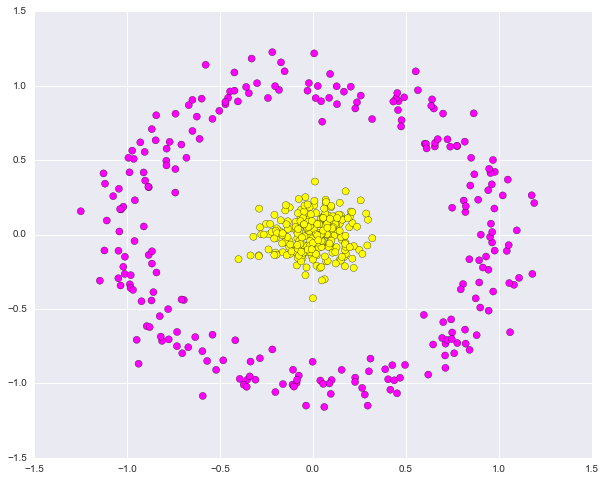

In [12]:
# Let's see this data we could use Guassian kernel SVM
from sklearn.datasets.samples_generator import make_circles
X, Y = make_circles(500, factor=.1, noise=.1,random_state=999)

plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='spring')

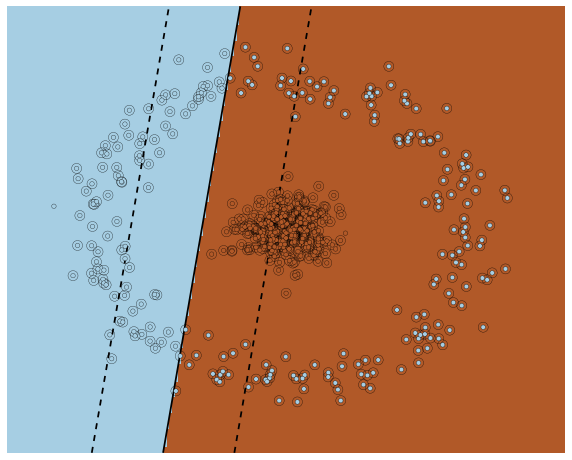

we successfully(IS) predict the 68.0 percent of data


In [13]:
# Let's have a quick look of linear SVM
clf = svm.SVC(kernel='linear',C=1) 
clf.fit(X, Y)

# plot the line, the points, and the nearest vectors to the plane

plt.clf()

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
            facecolors='none', zorder=10) # plot support vectors with small circle

plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired) # plot X,Y

plt.axis('tight')
x_min = -1.5
x_max = 1.5
y_min = -1.5
y_max = 1.5

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j] # all the points in the plane
Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()]) # put them in the desion function

# Put the result into a color plot
Z = Z.reshape(XX.shape)

plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired) # Make a color for all the points in plane by our decision function.

plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
            levels=[-.5, 0, .5])
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()
# Let's calculate the IS mistakes: (Just use clf.predic to compare the predicted labels with current labels)
print "we successfully(IS) predict the {} percent of data".format(1.0*(clf.predict(X)==Y).sum()/len(Y)*100)

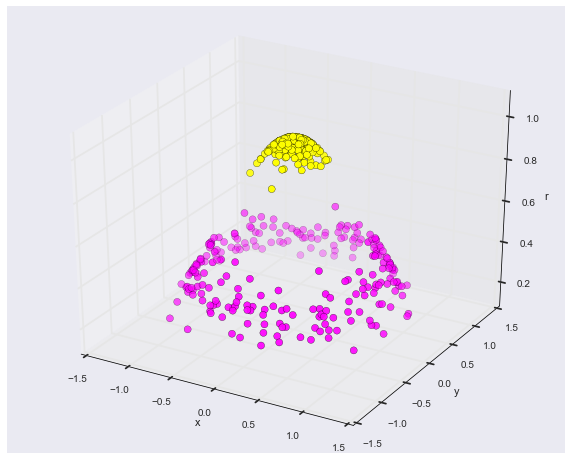

In [14]:
# See why Gussian kernal works:(Let's see the mapping to the higher dimensional space)
r = np.exp(-(X[:, 0] ** 2 + X[:, 1] ** 2))
from mpl_toolkits import mplot3d
#from IPython.html.widgets import interact


ax = plt.subplot(projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], r, c=Y, s=50, cmap='spring')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('r')

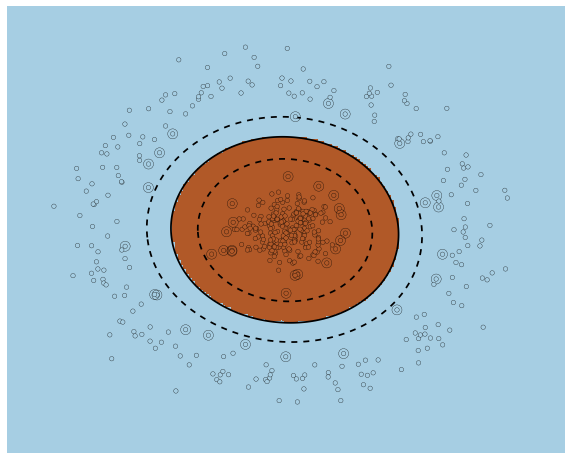

we successfully(IS) predict the 100.0 percent of data


In [15]:
#Gussian Kernal SVM
clf = svm.SVC(kernel='rbf') 

clf.fit(X, Y)

# plot the line, the points, and the nearest vectors to the plane

plt.clf()

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
            facecolors='none', zorder=10) # plot support vectors with small circle

plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired) # plot X,Y

plt.axis('tight')
x_min = -1.5
x_max = 1.5
y_min = -1.5
y_max = 1.5

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j] # all the points in the plane
Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()]) # put them in the desion function

# Put the result into a color plot
Z = Z.reshape(XX.shape)

plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired) # Make a color for all the points in plane by our decision function.

plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
            levels=[-.5, 0, .5])
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()
# Let's calculate the IS mistakes: (Just use clf.predic to compare the predicted labels with current labels)
print "we successfully(IS) predict the {} percent of data".format(100.0*(clf.predict(X)==Y).sum()/len(Y))

## Example 4. Polynomial kernal example

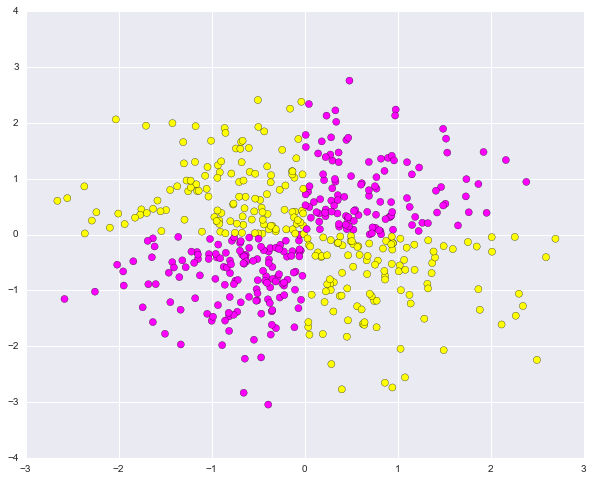

In [16]:
#generate data
np.random.seed(0)
X = np.random.randn(500, 2)
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)*1
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='spring')

In [17]:
# Obviousely, linear model won't work

# let's try a soft margin classifier model on the entire data with C=1. You can try other C as well, but the visual intuition hints that it won't help much

clf = svm.SVC(kernel='linear',C=1) 

clf.fit(X, Y)

print "we successfully predict the {} percent of data".format((clf.predict(X)==Y).sum()*100/len(Y))
print "this result means we cannot get any useful information. So we should use other SVM maybe non-linear ones"

we successfully predict the 52 percent of data
this result means we cannot get any useful information. So we should use other SVM maybe non-linear ones


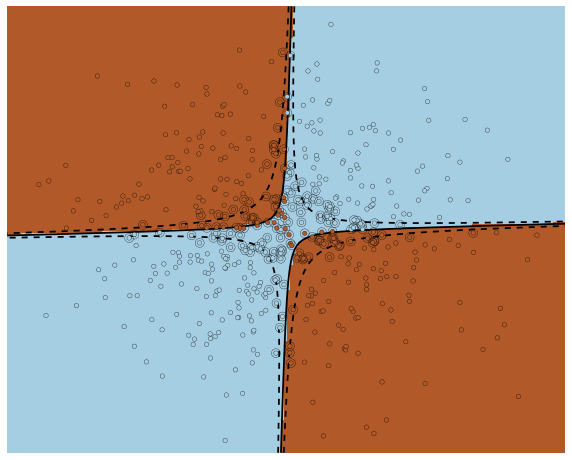

we successfully predict(IS) the 95 percent of data


In [18]:
# Now let's use polynomial kernal with degree 2 (think how distinctive the data above might be in terms of..see on the right....x1 x2 )
clf = svm.SVC(kernel='poly',degree=2) 
clf.fit(X, Y)

# plot the line, the points, and the nearest vectors to the plane

plt.clf()

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
            facecolors='none', zorder=10)
plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired)

plt.axis('tight')
x_min = -3
x_max = 3
y_min = -3
y_max = 3

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

# Put the result into a color plot
Z = Z.reshape(XX.shape)

plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
            levels=[-.5, 0, .5])

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.xticks(())
plt.yticks(())
plt.show()
print "we successfully predict(IS) the {} percent of data".format((Y==clf.predict(X)).sum()*100/len(Y))

In [19]:
#OS test
# As usual, let's divide our data to test data and train data.
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.33, random_state=999) #Use random_state to fix samples

clf = svm.SVC(kernel='poly',degree=2) 
clf.fit(X_train, Y_train)

correct=1.0*(clf.predict(X_test)==Y_test).sum()/len(Y_test)

print "we successfully(OS) predict the {} percent of data".format((correct)*100)


we successfully(OS) predict the 98.1818181818 percent of data


## Example 5. Where polynomial kernel could not work, but Gausian helps

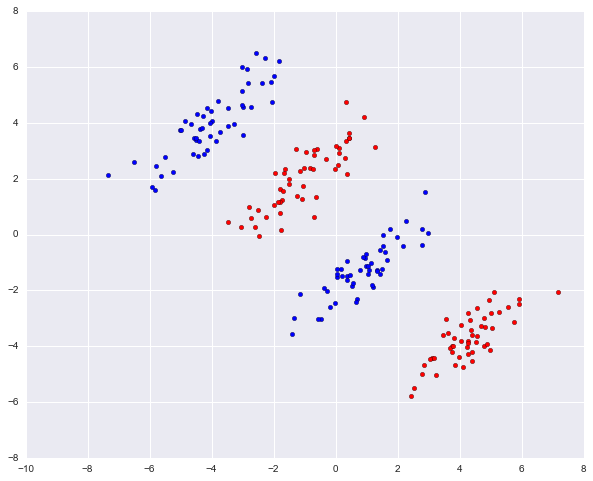

In [20]:
#Generate this artifitial data
mean1 = [-1, 2]
mean2 = [1, -1]
mean3 = [4, -4]
mean4 = [-4, 4]
cov = [[1.0,0.8], [0.8, 1.0]]
X1 = np.random.multivariate_normal(mean1, cov, 50)
X1 = np.vstack((X1, np.random.multivariate_normal(mean3, cov, 50)))
y1 = np.ones(len(X1))
X2 = np.random.multivariate_normal(mean2, cov, 50)
X2 = np.vstack((X2, np.random.multivariate_normal(mean4, cov, 50)))
y2 = np.ones(len(X2)) * -1
X=np.concatenate((X1,X2),axis=0)
Y=np.concatenate((y1,y2))
plt.scatter(X1[:,0],X1[:,1], c='r', cmap=plt.cm.Paired)
plt.scatter(X2[:,0],X2[:,1], c='b', cmap=plt.cm.Paired)
plt.show()

we successfully (IS) predict the 70.0 percent of data by linear


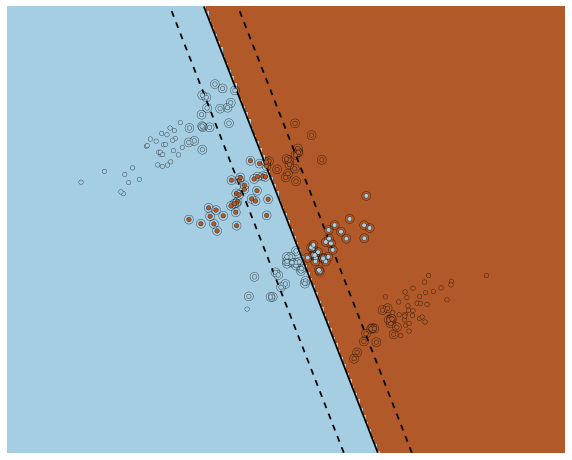

we successfully (IS) predict the 83.5 percent of data by poly


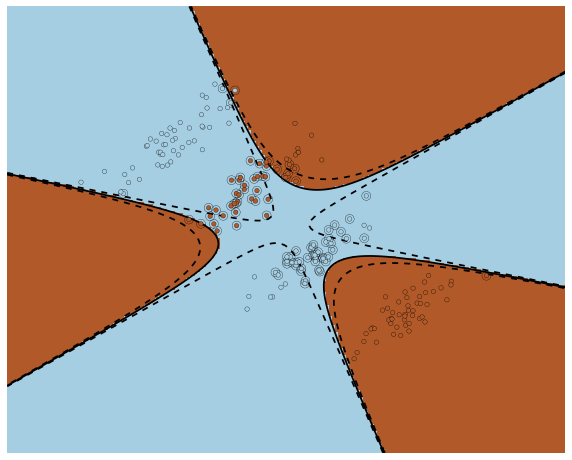

we successfully (IS) predict the 100.0 percent of data by rbf


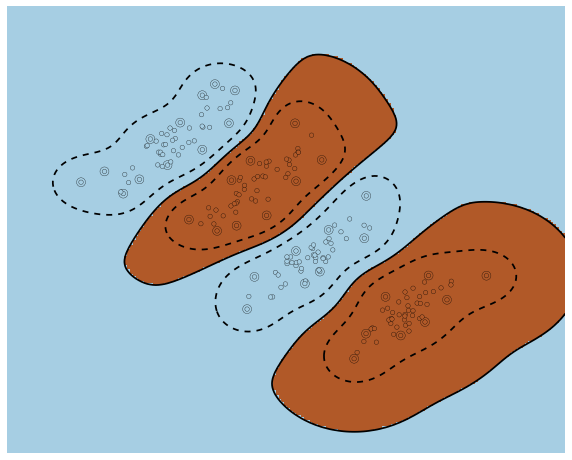

In [21]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

#Let's see the in the sample graph. 
# fit the model (Poly with degree=3, linear with C=1)
for kernel in ('linear', 'poly', 'rbf'):
    clf = svm.SVC(kernel=kernel)
    clf.fit(X, Y)

    # plot the line, the points, and the nearest vectors to the plane
  
    plt.clf()

    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                facecolors='none', zorder=10)
    plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired)

    plt.axis('tight')
    x_min = -10
    x_max = 10
    y_min = -10
    y_max = 10

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                levels=[-.5, 0, .5])

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.xticks(())
    plt.yticks(())
    print "we successfully (IS) predict the {} percent of data by {}".format(100.0*(clf.predict(X)==Y).sum()/len(Y),kernel)
  
    plt.show()

In [22]:
#Now let's compare the result of three models
#(training for C is now showed here(C=1), Choicing of degrees of polynomials is not showed(degree=3))
# Split data to test and training data 
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.33, random_state=99) #Use random_state to fix samples

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# fit the model (Poly with degree=3)
for kernel in ('linear', 'poly', 'rbf'):
    clf = svm.SVC(kernel=kernel)
    clf.fit(X_train, Y_train)
    correct=1.0*(clf.predict(X_test)==np.asarray(Y_test)).sum()/len(Y_test)
    print "we successfully(OS) predict the {} percent of data".format((correct)*100)

we successfully(OS) predict the 69.696969697 percent of data
we successfully(OS) predict the 86.3636363636 percent of data
we successfully(OS) predict the 100.0 percent of data


## Example 6. Further examples manageable by polynomial kernels

Feel free to do it yourself as an excercise, splitting data into training, validation and test set, selecting the model parameters (kernel degree and regularization constant) over the validation set and applying the classifier trained with the optimal model parameters over the training set to the test set.

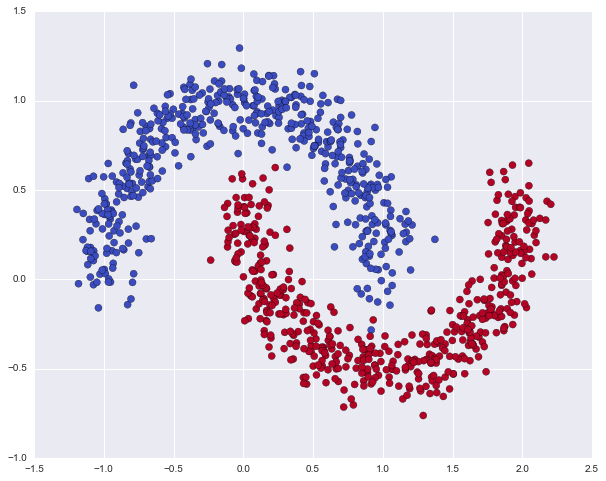

In [23]:
from sklearn.datasets import make_moons
np.random.seed(0)
X, Y = make_moons(1000, noise=0.11)
plt.scatter(X[:,0], X[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2));

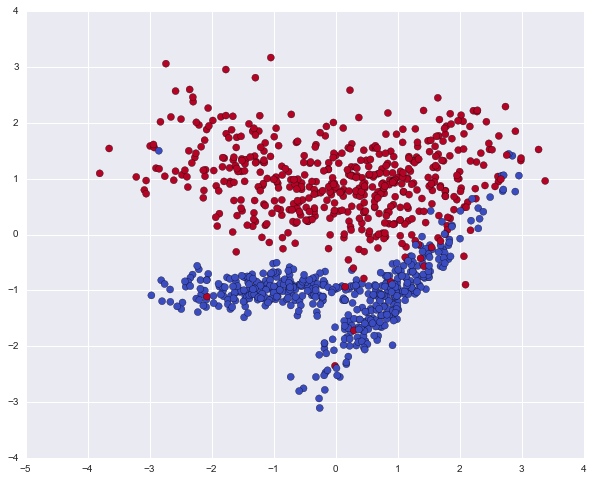

In [24]:
from sklearn.datasets import make_classification
np.random.seed(0)
X, Y = make_classification(1000,n_features=2,n_informative=2, n_redundant=0,n_clusters_per_class=2)
plt.scatter(X[:,0], X[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2));

## Example 7. Classification of individual/commercial houses

In [25]:
data = pd.read_csv("https://serv.cusp.nyu.edu/classes/ML_2016_Spring/session4/lecture//NYC_RE_sample.csv")
# split sample into training and test ones
data.columns=['index','area','land','year','price','bldtype']
data.bldtype=data.bldtype-1
X=data.iloc[:,1:5]
Y=data.iloc[:,5]
data.head()

,index,area,land,year,price,bldtype
0,1,2607,1200,2010,825000,0
1,2,1950,1783,1899,1685000,0
2,3,2520,1875,1899,1100000,0
3,4,3750,3125,1931,1200000,1
4,5,7812,5021,1908,1900000,1


In [26]:
from sklearn import preprocessing # data standardization highly recommended
X_scaled = preprocessing.scale(X)

In [27]:
pd.DataFrame(X_scaled).head()

,0,1,2,3
0,-0.284829,-0.452581,2.232000,-1.171637
1,-0.316094,-0.361470,-0.461891,-0.664654
2,-0.288970,-0.347092,-0.461891,-1.009520
3,-0.230438,-0.151743,0.314726,-0.950568
4,-0.037140,0.144564,-0.243467,-0.537908


In [28]:
from scipy import stats

#make this our new X
X=X_scaled
# Split data to test and training data
#(Let's use the same split as we did in lecture 4)
#split dataset into 60% training and 40% test 

np.random.seed(2015)
ind=stats.bernoulli.rvs(p = 0.6, size = len(X))
X_train=X[ind==1]
X_test=X[ind==0]
Y_train=Y[ind==1]
Y_test=Y[ind==0]

# Let us remind the previous result.
# By Naive Bayes, the OS accuracy was 82.92.

#### (A) Let's have a look linear model with soft margin.

In [29]:
#Now let's compare the result of three models
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

#(1) Let's have a look linear model with a default C=1.
clf = svm.SVC(kernel='linear',C=1)
clf.fit(X_train, Y_train)
correct=1.0*(clf.predict(X_test)==np.asarray(Y_test)).sum()/len(Y_test)
print "we successfully(OS) predict the {} percent of data by {}".format((correct)*100,'linear')

we successfully(OS) predict the 80.487804878 percent of data by linear


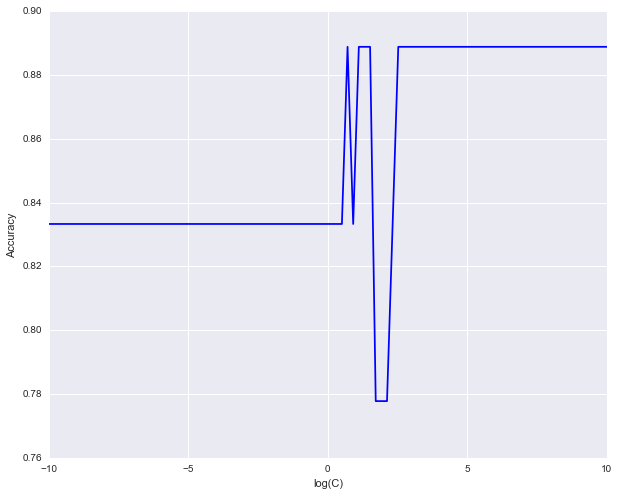

The optimal C we found is:911162.756115 w.r.t. max accuracy :0.888888888889


In [30]:
# Let's do cross validation for choosing C since we see the result is not
#really good compared to the one we had before with Naive Bayes

import pylab
import math
# Let's devide the training set into training set and validation set.
X_train_1,X_vali,Y_train_1,Y_vali = train_test_split(
    X_train, Y_train, test_size=0.33, random_state=2999)
#When C is very small, which means we want to tolerate more mistakes. If C is very big, which 
#means we do not tolerate much mistakes - getting rid of any single mistake then is worth more than making the margin high
C = 10**np.linspace(-10,10,100) 
OS_validation=[]
for c in C:
    clf = svm.SVC(kernel='linear',C=c) 
    clf.fit(X_train_1, Y_train_1)
    right=1.0*(clf.predict(X_vali)==np.asarray(Y_vali)).sum()/len(Y_vali) #OS score for validation set
    
    OS_validation.append(right)
temp=pd.DataFrame([C,OS_validation]).T #put results together.
ind=len(temp.loc[temp.iloc[:,1]==temp.iloc[:,1].max()])/2 # we took the middle point for points w.r.t. max accuracy
C_opt=temp.loc[temp.iloc[:,1]==temp.iloc[:,1].max()].iloc[ind,0]

C=[math.log(y,10) for y in C]# for a better graph

pylab.plot(C,OS_validation,'b',)
pylab.legend(loc='upper right')
pylab.ylabel('Accuracy')
pylab.xlabel('log(C)')
pylab.show()

print("The optimal C we found is:{} w.r.t. max accuracy :{}".format(C_opt,temp.iloc[:,1].max())) # we choose the biggest one to stay on the safe side


#### we choose C=C_opt and let's see the OS test.

In [31]:
clf = svm.SVC(kernel='linear',C=C_opt)
clf.fit(X_train, Y_train)
correct=1.0*(clf.predict(X_test)==np.asarray(Y_test)).sum()/len(Y_test)
print "we successfully(OS) predict the {} percent of data by using linear kernel".format((correct)*100)

we successfully(OS) predict the 92.6829268293 percent of data by using linear kernel


#### (B) Polynomial kernel

In [32]:
#Polynomial kernel. (Default C=1,Poly=3)
clf = svm.SVC(kernel='poly')
clf.fit(X_train, Y_train)
correct=1.0*(clf.predict(X_test)==np.asarray(Y_test)).sum()/len(Y_test)
print "we successfully(OS) predict the {} percent of data by poly".format((correct)*100)

we successfully(OS) predict the 63.4146341463 percent of data by poly


In [33]:
def svmPoly(X, Y, d, ri, maxlC, maxlC0):
    # perform the validation to pick up the best parameters and train the classifier
    X_train,X_valid,Y_train,Y_valid = train_test_split(X, Y, test_size=0.33, random_state=ri)
    C_opt=[0]*len(d)
    C0_opt=[0]*len(d)
    M=[0]*len(d)
    Crange=10**np.linspace(-5,maxlC,20)
    if maxlC0>-3:
        C0range=[0] + 10**np.linspace(-3,maxlC0,20)
    else:
        C0range=[0]
    C,C0=np.meshgrid(Crange,C0range)
    C=C.reshape(1,len(Crange)*len(C0range))[0]
    C0=C0.reshape(1,len(Crange)*len(C0range))[0]
    K=len(C)
    for d_ in range(0,len(d)):
        degree=d[d_]
        OS_validation=[]
        for i in range(0,K):
            clf = svm.SVC(kernel='poly',C=C[i],coef0=C0[i],degree=degree,max_iter=100) 
            clf.fit(X_train, Y_train)
            right=1.0*(clf.predict(X_valid)==np.asarray(Y_valid)).sum()/len(Y_valid)
            OS_validation.append(right)
        OS_validation=np.array(OS_validation)    
        M[d_]=max(OS_validation)
        C_opt[d_]=max(C[OS_validation==M[d_]])
        C0_opt[d_]=max(C0[OS_validation==M[d_]])
        print("for degree={0}, we get max accuracy={1} with C={2},C0={3}:".format(degree,M[d_],C_opt[d_],C0_opt[d_]))
    M_=max(M)
    d_=M.index(M_)
    return svm.SVC(kernel='poly',C=C_opt[d_],coef0=C0_opt[d_],degree=d[d_])

In [34]:
clf=svmPoly(X_train, Y_train, range(1,7), 2999, 10, 3)

for degree=1, we get max accuracy=0.888888888889 with C=10000000000.0,C0=1000.0:
for degree=2, we get max accuracy=0.944444444444 with C=0.088586679041,C0=483.293023857:
for degree=3, we get max accuracy=0.888888888889 with C=10000000000.0,C0=1000.0:
for degree=4, we get max accuracy=0.888888888889 with C=0.545559478117,C0=112.883789168:
for degree=5, we get max accuracy=0.888888888889 with C=0.088586679041,C0=26.3665089873:
for degree=6, we get max accuracy=0.888888888889 with C=0.088586679041,C0=12.742749857:


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/svm/base.py:209: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


So we'll go with the minimal optimal degree=2 and the C,C0 as above

In [35]:
#Polynomial kernel - OS performance 
clf.fit(X_train, Y_train)
correct=1.0*(clf.predict(X_test)==np.asarray(Y_test)).sum()/len(Y_test)
print "we successfully(OS) predict the {} percent of data by poly".format((correct)*100)

we successfully(OS) predict the 95.1219512195 percent of data by poly


#### (C) Guassian Kernel

In [36]:
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, Y_train)
correct=1.0*(clf.predict(X_test)==np.asarray(Y_test)).sum()/len(Y_test)
print "we successfully(OS) predict the {} percent of data by Guassian kernel".format((correct)*100)

we successfully(OS) predict the 78.0487804878 percent of data by Guassian kernel


Again as the default parameters $\gamma$ and C do not seem to work that well, try to fit them through validation

In [37]:
def svmGaussian(X, Y, ri, maxlC, maxlC0):
    # perform the validation to pick up the best parameters and train the classifier
    X_train,X_valid,Y_train,Y_valid = train_test_split(X, Y, test_size=0.33, random_state=ri)
    Crange=10**np.linspace(-5,maxlC,20)
    if maxlC0>-3:
        C0range=10**np.linspace(-3,maxlC0,20)
    else:
        C0range=[['auto']]
    C,C0=np.meshgrid(Crange,C0range)
    C=C.reshape(1,len(Crange)*len(C0range))[0]
    C0=C0.reshape(1,len(Crange)*len(C0range))[0]
    OS_validation=[]
    K=len(C)
    for i in range(0,K):
            clf = svm.SVC(kernel='rbf',C=C[i],gamma=C0[i]) 
            clf.fit(X_train, Y_train)
            right=1.0*(clf.predict(X_valid)==np.asarray(Y_valid)).sum()/len(Y_valid)
            OS_validation.append(right)
    OS_validation=np.array(OS_validation)    
    M=max(OS_validation)
    C_opt=max(C[OS_validation==M])
    C0_opt=max(C0[OS_validation==M])
    print("We get max accuracy={0} with C={1},gamma={2}:".format(M,C_opt,C0_opt))
    return svm.SVC(kernel='rbf',C=C_opt,gamma=C0_opt)

In [38]:
clf=svmGaussian(X_train, Y_train, 2999, 10, 3)

We get max accuracy=0.944444444444 with C=4832.93023857,gamma=0.0088586679041:


In [39]:
clf.fit(X_train, Y_train)
correct=1.0*(clf.predict(X_test)==np.asarray(Y_test)).sum()/len(Y_test)
print "we successfully(OS) predict the {} percent of data by Gaussian".format((correct)*100)

we successfully(OS) predict the 95.1219512195 percent of data by Gaussian


## Example 8. Spam classification

In [40]:
import urllib
data = urllib.urlopen("https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data").read()
data_name=urllib.urlopen("https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.names").read()
# Read the data
data=data.split("\r\n")
data_spam=[]
for i in range(len(data)):
    if len(data[i])>0:
        temp=data[i].split(",")
        #change from str to float
        t_l=[]
        for j in range(len(temp)):
            t_l.append(float(temp[j]))
        data_spam.append(t_l)

#Read the column names
temp=data_name.split("\r\n")
column_names=[]
for i in temp:
    if (i.startswith('word') or i.startswith('char') or i.startswith('capital')):
        column_names.append(i.split(":")[0])
column_names.append("spam") 

In [41]:
#Generate the data set for our tests
data_spam=pd.DataFrame(data_spam)
data_spam.columns=column_names
X=data_spam.iloc[:,0:-1]
Y=data_spam.iloc[:,-1]
#scale
X_scale=preprocessing.scale(X)
X=X_scale
X=pd.DataFrame(X)

In [42]:
import random
# Divide the data into test and traing sets as we did in lecture 5.
random.seed(2015)
train_index=random.sample(list(range(len(X))),int(len(X)*0.8))
test_index=[x for x in list(range(len(X))) if x not in train_index]
X_train=X.iloc[train_index,:]
X_test=X.iloc[test_index,:]
Y_train=Y.iloc[train_index]
Y_test=Y.iloc[test_index]

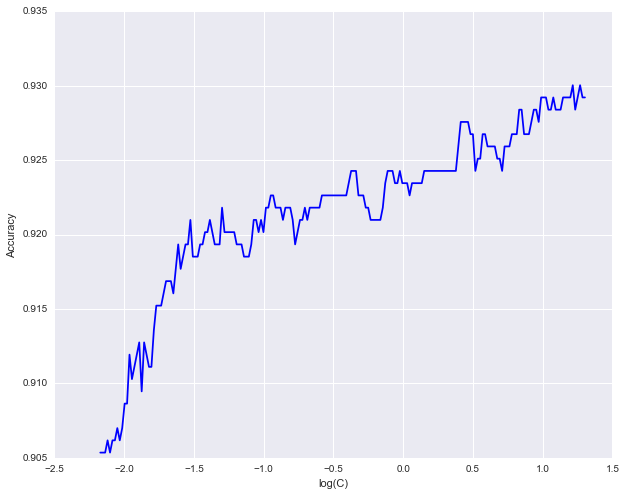

The optimal C we found is:18.5338351739


In [43]:
# As validation is a bit time consuming we'll only limit ourselves with a linear kernel

import pylab
import math
# Let's devide the training set into training set and validation set.
X_train_1,X_vali,Y_train_1,Y_vali = train_test_split(
    X_train, Y_train, test_size=0.33, random_state=99)
#When C is very small, which means we want to tolerate more mistakes. If C is very big, which 
#means we do not tolerate much mistakes. 
C = np.linspace(-5,3,200)
C=[math.exp(i) for i in C]
OS_validation=[]
for c in C:
    clf = svm.SVC(kernel='linear',C=c) 
    clf.fit(X_train_1, Y_train_1)
    right=1.0*(clf.predict(X_vali)==np.asarray(Y_vali)).sum()/len(Y_vali)
    OS_validation.append(right)
    
temp=pd.DataFrame([C,OS_validation]).T
ind=len(temp.loc[temp.iloc[:,1]==temp.iloc[:,1].max()])/2 
C_opt=temp.loc[temp.iloc[:,1]==temp.iloc[:,1].max()].iloc[ind,0]


C=[math.log(y,10) for y in C]# for a better graph
pylab.plot(C,OS_validation,'b',)
pylab.legend(loc='upper right')
pylab.ylabel('Accuracy')
pylab.xlabel('log(C)')
pylab.show()

print("The optimal C we found is:{}".format(C_opt)) 


In [44]:
clf = svm.SVC(kernel='linear',C=C_opt)
clf.fit(X_train, Y_train)
correct=1.0*(clf.predict(X_test)==np.asarray(Y_test)).sum()/len(Y_test)
print "we successfully(OS) predict the {} percent of data by using linear kernel".format((correct)*100)

we successfully(OS) predict the 92.1824104235 percent of data by using linear kernel
